In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

In [35]:
# Load the data
df = pd.read_csv('data/novagraph_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   _id                                132 non-null    object
 1   conversationNumber                 132 non-null    int64 
 2   questionNumber                     132 non-null    int64 
 3   input                              132 non-null    object
 4   translatedInput                    132 non-null    object
 5   originalInputResponse              132 non-null    object
 6   originalInputResponseVote          132 non-null    int64 
 7   expertOriginalInputResponseVote    132 non-null    int64 
 8   translatedInputResponse            132 non-null    object
 9   translatedInputResponseVote        132 non-null    int64 
 10  expertTranslatedInputResponseVote  132 non-null    int64 
 11  createdAt                          132 non-null    object
 12  updatedA

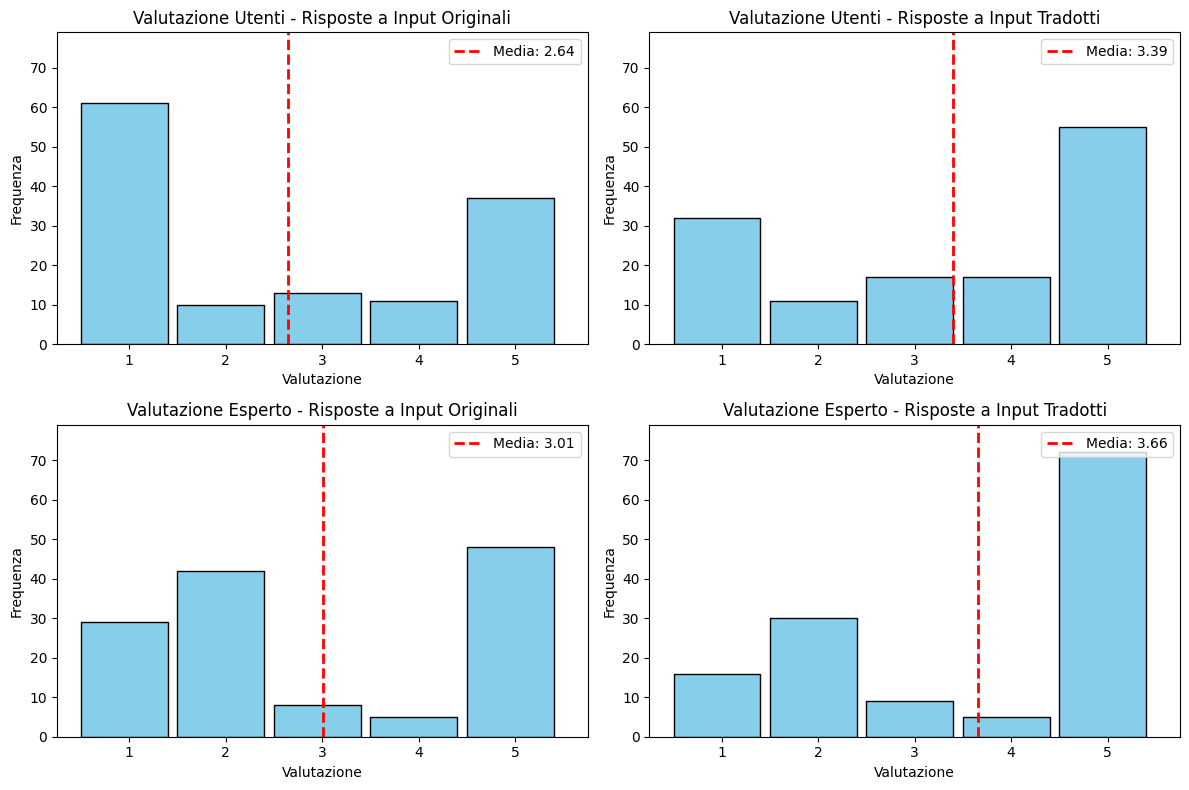

In [52]:
# Dati per gli istogrammi
votes_columns = [
    'originalInputResponseVote', 
    'translatedInputResponseVote', 
    'expertOriginalInputResponseVote', 
    'expertTranslatedInputResponseVote'
]

# Nuovi titoli per i grafici
votes_titles = [
    'Valutazione Utenti - Risposte a Input Originali', 
    'Valutazione Utenti - Risposte a Input Tradotti', 
    'Valutazione Esperto - Risposte a Input Originali', 
    'Valutazione Esperto - Risposte a Input Tradotti'
]

# Calcolo delle medie per le 4 categorie di voti
votes_means = [
    df['originalInputResponseVote'].mean(), 
    df['translatedInputResponseVote'].mean(), 
    df['expertOriginalInputResponseVote'].mean(), 
    df['expertTranslatedInputResponseVote'].mean()
]

# Creazione dei grafici con layout corretti
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Due righe e due colonne di grafici
axes = axes.flatten()  # Flatten per iterare facilmente

# Creazione degli istogrammi con visualizzazione della media
for i, column in enumerate(votes_columns):
    # Creazione dell'istogramma con align e modifica di width per centrare le barre
    axes[i].hist(df[column], bins=5, range=(1, 6), color='skyblue', edgecolor='black', align='left', width=0.9)
    
    # Aggiunta della linea rossa tratteggiata per la media
    axes[i].axvline(votes_means[i], color='red', linestyle='dashed', linewidth=2, label=f'Media: {votes_means[i]:.2f}')  
    
    # Impostazione del titolo
    axes[i].set_title(votes_titles[i])
    
    # Impostazione delle etichette degli assi
    axes[i].set_xlabel('Valutazione')
    axes[i].set_ylabel('Frequenza')
    
    # Imposta i limiti dell'asse Y per avere la stessa scala in tutti i grafici
    axes[i].set_ylim(0, 79)
    
    # Assicurati che l'asse X mostri solo numeri interi
    axes[i].set_xticks(range(1, 6))  # Voti da 1 a 5
    
    # Aggiunta della legenda per mostrare la media
    axes[i].legend(loc='upper right')

# Miglioramento del layout per evitare sovrapposizioni
plt.tight_layout()

# Mostrare il grafico
plt.show()


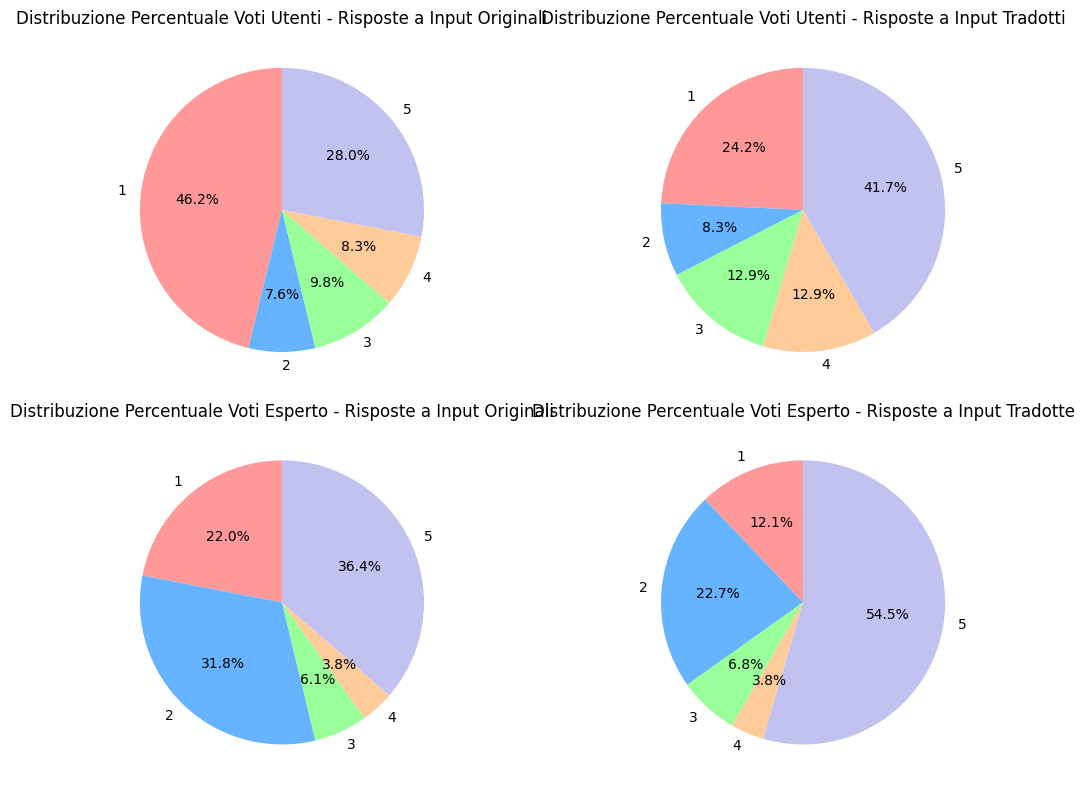

In [49]:
# Dati per i tipi di voto (1, 2, 3, 4, 5)
vote_values = [1, 2, 3, 4, 5]

# Dati per gli istogrammi
votes_columns = [
    'originalInputResponseVote', 
    'translatedInputResponseVote', 
    'expertOriginalInputResponseVote', 
    'expertTranslatedInputResponseVote'
]

# Titoli per i grafici a torta
votes_titles_pie = [
    'Distribuzione Percentuale Voti Utenti - Risposte a Input Originali', 
    'Distribuzione Percentuale Voti Utenti - Risposte a Input Tradotti', 
    'Distribuzione Percentuale Voti Esperto - Risposte a Input Originali', 
    'Distribuzione Percentuale Voti Esperto - Risposte a Input Tradotte'
]

# Creazione dei grafici a torta
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Loop su ciascun tipo di voto per creare il grafico a torta
for i, column in enumerate(votes_columns):
    vote_counts = [sum(df[column] == v) for v in vote_values]  # Conta la frequenza di ciascun voto
    axes[i].pie(vote_counts, labels=vote_values, autopct='%1.1f%%', startangle=90, 
                colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
    axes[i].set_title(votes_titles_pie[i])

# Imposta il layout per evitare sovrapposizioni
plt.tight_layout()
plt.show()

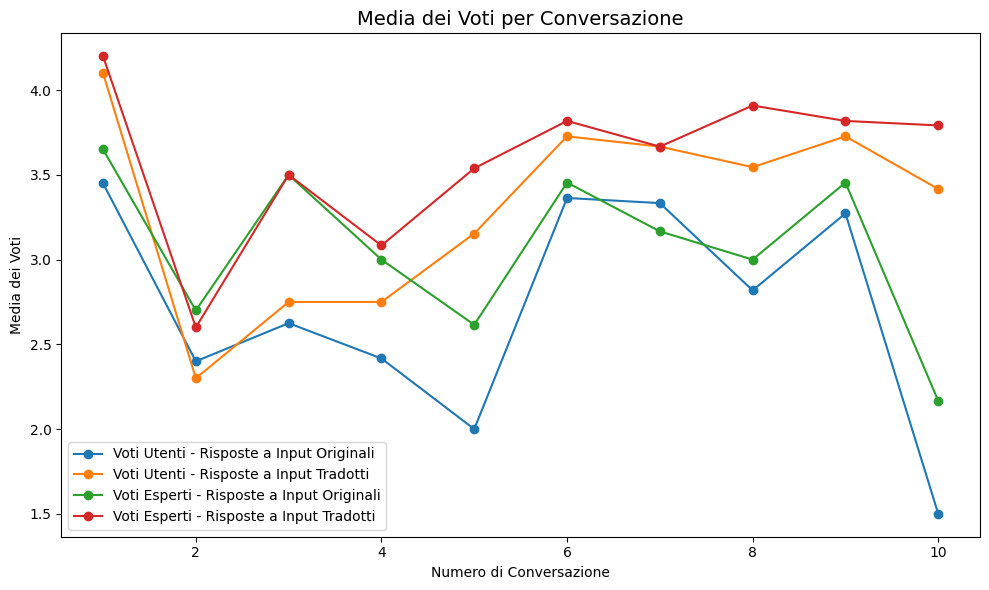

In [38]:
# Calcolo della media dei voti per ogni conversazione
mean_votes_by_conversation = df.groupby('conversationNumber')[
    ['originalInputResponseVote', 'translatedInputResponseVote', 'expertOriginalInputResponseVote', 'expertTranslatedInputResponseVote']
].mean()

# Creazione del grafico a linee
plt.figure(figsize=(10, 6))

# Linea per ogni tipo di voto
plt.plot(mean_votes_by_conversation.index, mean_votes_by_conversation['originalInputResponseVote'], 
         marker='o', label='Voti Utenti - Risposte a Input Originali')
plt.plot(mean_votes_by_conversation.index, mean_votes_by_conversation['translatedInputResponseVote'], 
         marker='o', label='Voti Utenti - Risposte a Input Tradotti')
plt.plot(mean_votes_by_conversation.index, mean_votes_by_conversation['expertOriginalInputResponseVote'], 
         marker='o', label='Voti Esperti - Risposte a Input Originali')
plt.plot(mean_votes_by_conversation.index, mean_votes_by_conversation['expertTranslatedInputResponseVote'], 
         marker='o', label='Voti Esperti - Risposte a Input Tradotti')

# Aggiunta di etichette e titolo
plt.title('Media dei Voti per Conversazione', fontsize=14)
plt.xlabel('Numero di Conversazione')
plt.ylabel('Media dei Voti')
plt.legend()

# Mostra il grafico
plt.tight_layout()
plt.show()

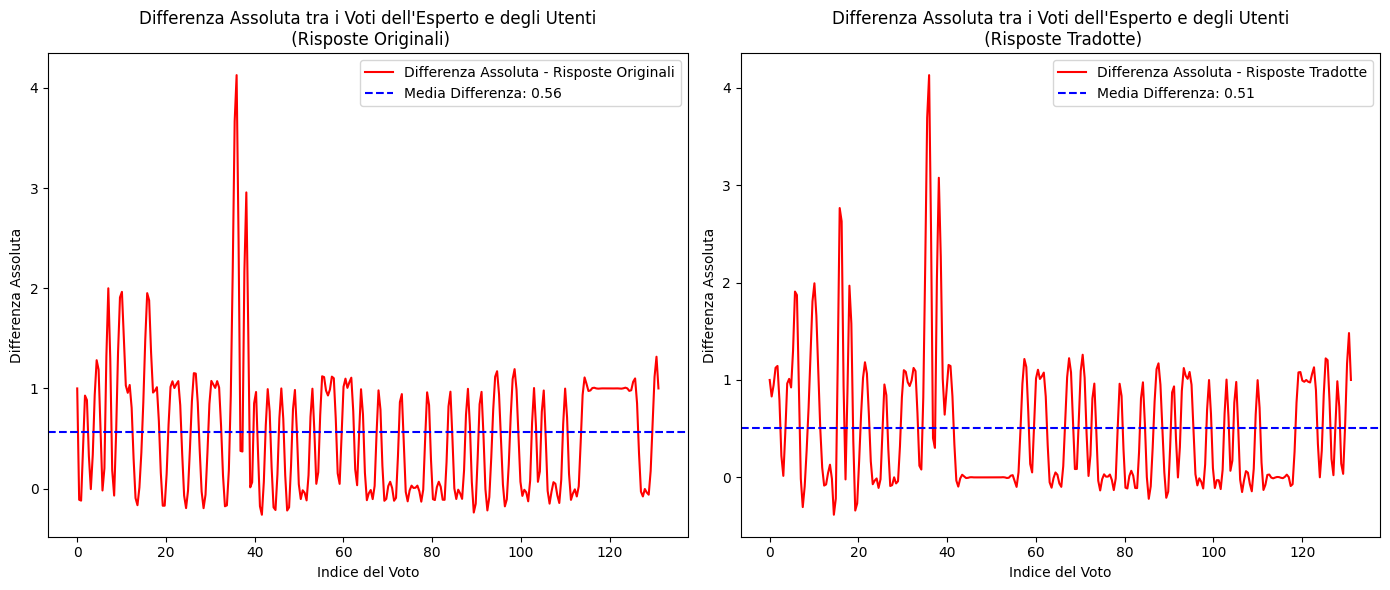

In [39]:
# Funzione per rendere le linee più morbide
def smooth_line(x, y):
    x_new = np.linspace(x.min(), x.max(), 300)  # Più punti per una linea liscia
    spl = make_interp_spline(x, y, k=3)  # Interpolazione Cubica (k=3)
    y_smooth = spl(x_new)
    return x_new, y_smooth

# Calcolo delle differenze in valore assoluto
differenza_originale_abs = abs(df['expertOriginalInputResponseVote'] - df['originalInputResponseVote'])
differenza_tradotta_abs = abs(df['expertTranslatedInputResponseVote'] - df['translatedInputResponseVote'])

# Calcolo delle medie delle differenze
media_differenza_originale = np.mean(differenza_originale_abs)
media_differenza_tradotta = np.mean(differenza_tradotta_abs)

# Creazione dei grafici affiancati
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 riga, 2 colonne

# Grafico per la differenza nelle risposte originali
x_smooth, y_smooth_originale = smooth_line(np.array(df.index), np.array(differenza_originale_abs))
axes[0].plot(x_smooth, y_smooth_originale, color='red', label='Differenza Assoluta - Risposte Originali')
axes[0].axhline(media_differenza_originale, color='blue', linestyle='--', label=f'Media Differenza: {media_differenza_originale:.2f}')
axes[0].set_title('Differenza Assoluta tra i Voti dell\'Esperto e degli Utenti\n (Risposte Originali)', fontsize=12)
axes[0].set_xlabel('Indice del Voto')
axes[0].set_ylabel('Differenza Assoluta')
axes[0].legend()

# Grafico per la differenza nelle risposte tradotte
x_smooth, y_smooth_tradotta = smooth_line(np.array(df.index), np.array(differenza_tradotta_abs))
axes[1].plot(x_smooth, y_smooth_tradotta, color='red', label='Differenza Assoluta - Risposte Tradotte')
axes[1].axhline(media_differenza_tradotta, color='blue', linestyle='--', label=f'Media Differenza: {media_differenza_tradotta:.2f}')
axes[1].set_title('Differenza Assoluta tra i Voti dell\'Esperto e degli Utenti\n (Risposte Tradotte)', fontsize=12)
axes[1].set_xlabel('Indice del Voto')
axes[1].set_ylabel('Differenza Assoluta')
axes[1].legend()

# Miglioramento del layout per evitare sovrapposizioni
plt.tight_layout()
plt.show()

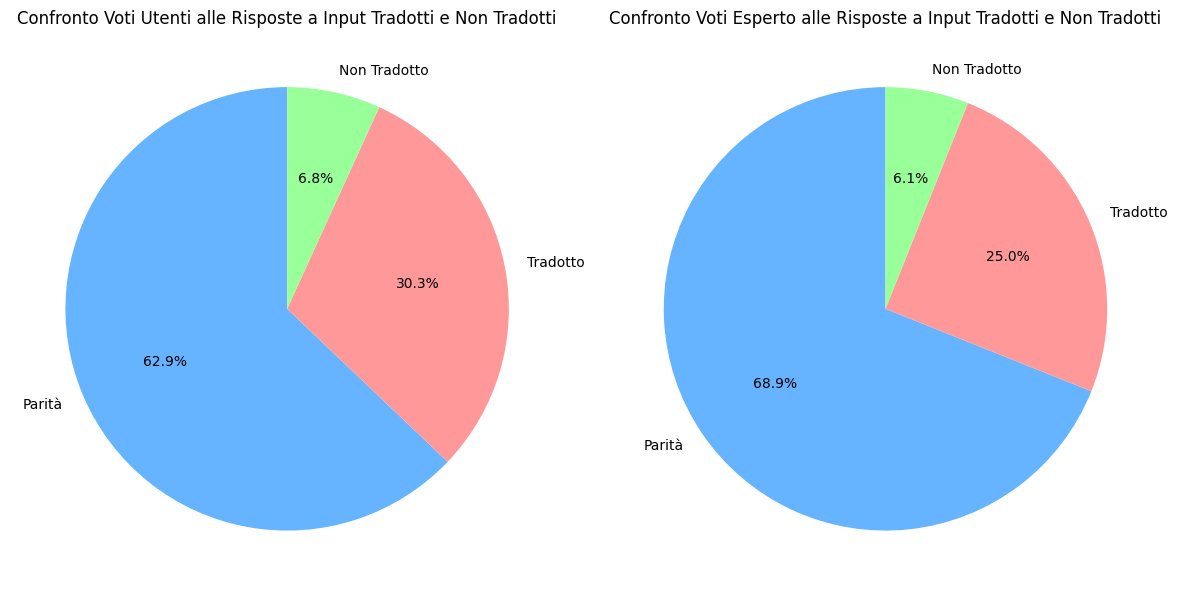

In [40]:
# Funzione per confrontare i voti e restituire la categoria ("Tradotto", "Non Tradotto" o "Parità")
def confronta_voti(voto_tradotto, voto_non_tradotto):
    if voto_tradotto > voto_non_tradotto:
        return "Tradotto"
    elif voto_tradotto < voto_non_tradotto:
        return "Non Tradotto"
    else:
        return "Parità"

# Applicazione della funzione per i voti degli utenti
confronto_utenti = df.apply(lambda row: confronta_voti(row['translatedInputResponseVote'], row['originalInputResponseVote']), axis=1)

# Applicazione della funzione per i voti degli esperti
confronto_esperti = df.apply(lambda row: confronta_voti(row['expertTranslatedInputResponseVote'], row['expertOriginalInputResponseVote']), axis=1)

# Calcolo delle percentuali per gli utenti
percentuali_utenti = confronto_utenti.value_counts(normalize=True) * 100

# Calcolo delle percentuali per gli esperti
percentuali_esperti = confronto_esperti.value_counts(normalize=True) * 100

# Creazione dei grafici a torta uno accanto all'altro
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Grafico a torta per gli utenti
axes[0].pie(percentuali_utenti, labels=percentuali_utenti.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999','#99ff99'], startangle=90)
axes[0].set_title('Confronto Voti Utenti alle Risposte a Input Tradotti e Non Tradotti', fontsize=12)
axes[0].set(aspect="equal")  # Imposta l'aspetto del grafico come un cerchio perfetto

# Grafico a torta per gli esperti
axes[1].pie(percentuali_esperti, labels=percentuali_esperti.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999','#99ff99'], startangle=90)
axes[1].set_title('Confronto Voti Esperto alle Risposte a Input Tradotti e Non Tradotti', fontsize=12)
axes[1].set(aspect="equal")  # Imposta l'aspetto del grafico come un cerchio perfetto

# Layout per evitare sovrapposizioni
plt.tight_layout()
plt.show()

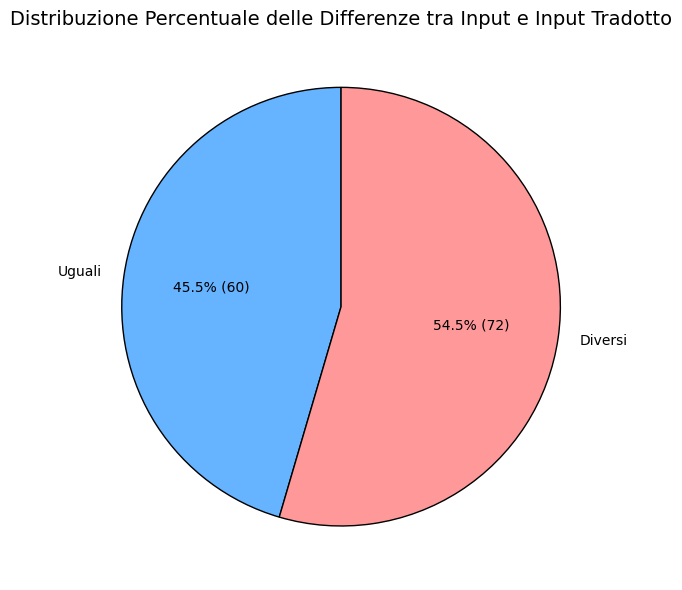

In [41]:
# Calcolo delle percentuali delle tuple in cui 'input' e 'translatedInput' sono uguali o diverse
uguali = (df['input'] == df['translatedInput']).sum()
diverse = (df['input'] != df['translatedInput']).sum()

# Percentuali
percentuali = [uguali, diverse]
labels = ['Uguali', 'Diversi']

# Creazione del grafico a torta
plt.figure(figsize=(6, 6))

# Aggiornamento dell'autopct per mostrare sia le percentuali che i numeri assoluti
plt.pie(percentuali, labels=labels, autopct=lambda p: f'{p:.1f}% ({int(p*sum(percentuali)/100)})', 
        colors=['#66b3ff', '#ff9999'], startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title('Distribuzione Percentuale delle Differenze tra Input e Input Tradotto', fontsize=14)
plt.axis('equal')  # Assicura che il grafico sia un cerchio

# Miglioramento del layout per evitare sovrapposizioni
plt.tight_layout()
plt.show()

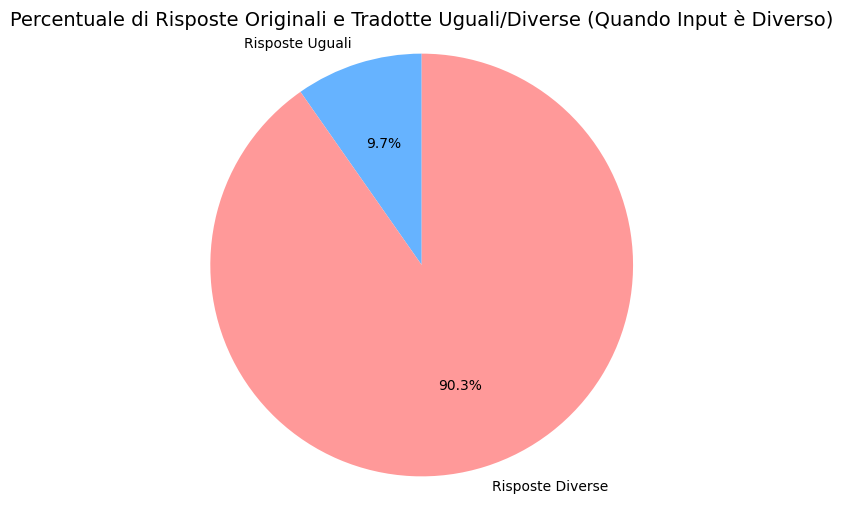

In [42]:
# Filtriamo le tuple in cui 'input' e 'translatedInput' sono diversi
diverse_df = df[df['input'] != df['translatedInput']]

# Calcolo delle percentuali in cui 'originalInputResponse' e 'translatedInputResponse' sono uguali o diverse
uguali_risposte = (diverse_df['originalInputResponse'] == diverse_df['translatedInputResponse']).sum()
diverse_risposte = (diverse_df['originalInputResponse'] != diverse_df['translatedInputResponse']).sum()

# Percentuali per il nuovo confronto
percentuali_risposte = [uguali_risposte, diverse_risposte]
labels_risposte = ['Risposte Uguali', 'Risposte Diverse']

# Creazione del grafico a torta
plt.figure(figsize=(6, 6))
plt.pie(percentuali_risposte, labels=labels_risposte, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)
plt.title('Percentuale di Risposte Originali e Tradotte Uguali/Diverse (Quando Input è Diverso)', fontsize=14)
plt.axis('equal')  # Assicura che il grafico sia un cerchio
plt.show()


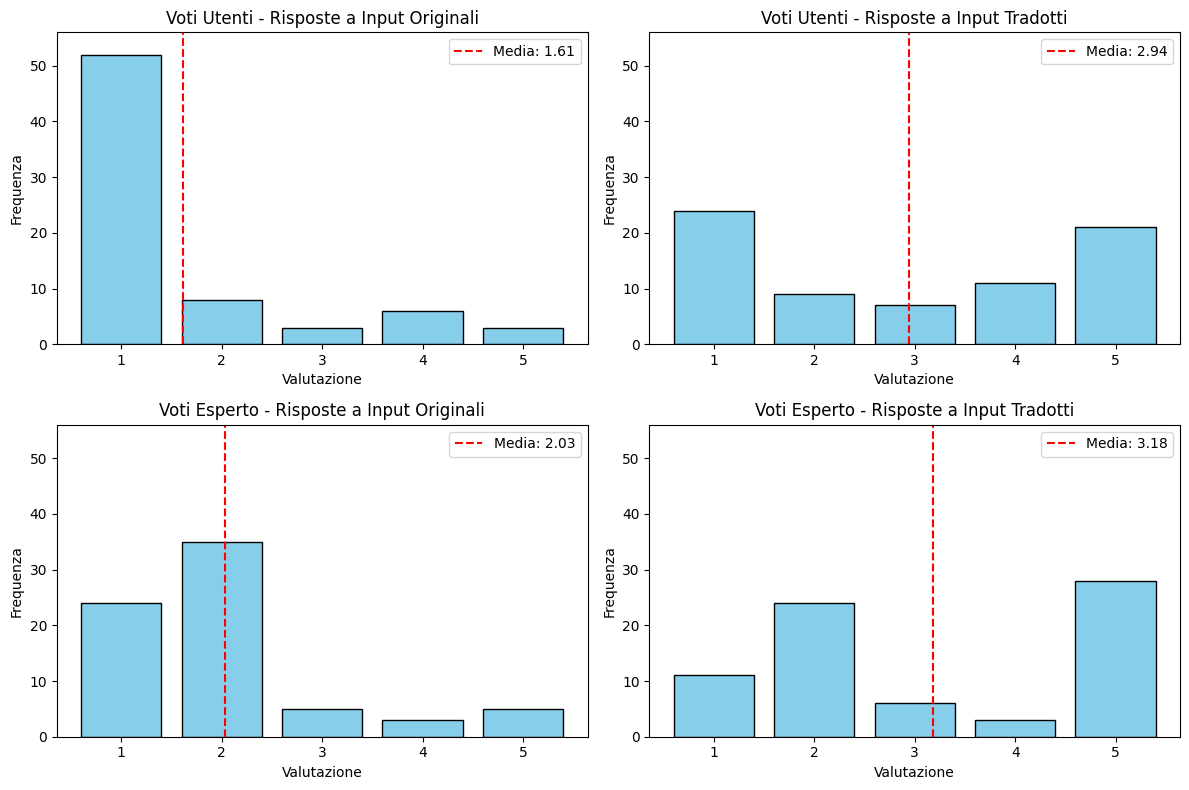

In [55]:
# Filtriamo le tuple in cui 'input' e 'translatedInput' sono diversi
diverse_df = df[df['input'] != df['translatedInput']]

# Definiamo le colonne di interesse
columns = ['originalInputResponseVote', 'translatedInputResponseVote', 'expertOriginalInputResponseVote', 'expertTranslatedInputResponseVote']
titles = ['Voti Utenti - Risposte a Input Originali', 'Voti Utenti - Risposte a Input Tradotti', 'Voti Esperto - Risposte a Input Originali', 'Voti Esperto - Risposte a Input Tradotti']

# Creazione del grafico a 4
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Loop su ciascuna colonna
for i, column in enumerate(columns):
    # Conteggio delle valutazioni 1, 2, 3, 4, 5
    counts = diverse_df[column].value_counts().sort_index()
    
    # Media delle valutazioni
    media_valutazioni = diverse_df[column].mean()
    
    # Creazione dell'istogramma
    axes[i].bar(counts.index, counts.values, color='skyblue', edgecolor='black')
    
    # Aggiunta della linea verticale della media
    axes[i].axvline(media_valutazioni, color='red', linestyle='--', label=f'Media: {media_valutazioni:.2f}')
    
    # Impostazioni del grafico
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Valutazione')
    axes[i].set_ylabel('Frequenza')
    
    # Imposta i limiti dell'asse Y a 70 per uniformare la scala
    axes[i].set_ylim(0, 56)
    
    # Aggiunta della legenda
    axes[i].legend()

# Imposta un layout migliore
plt.tight_layout()
plt.show()

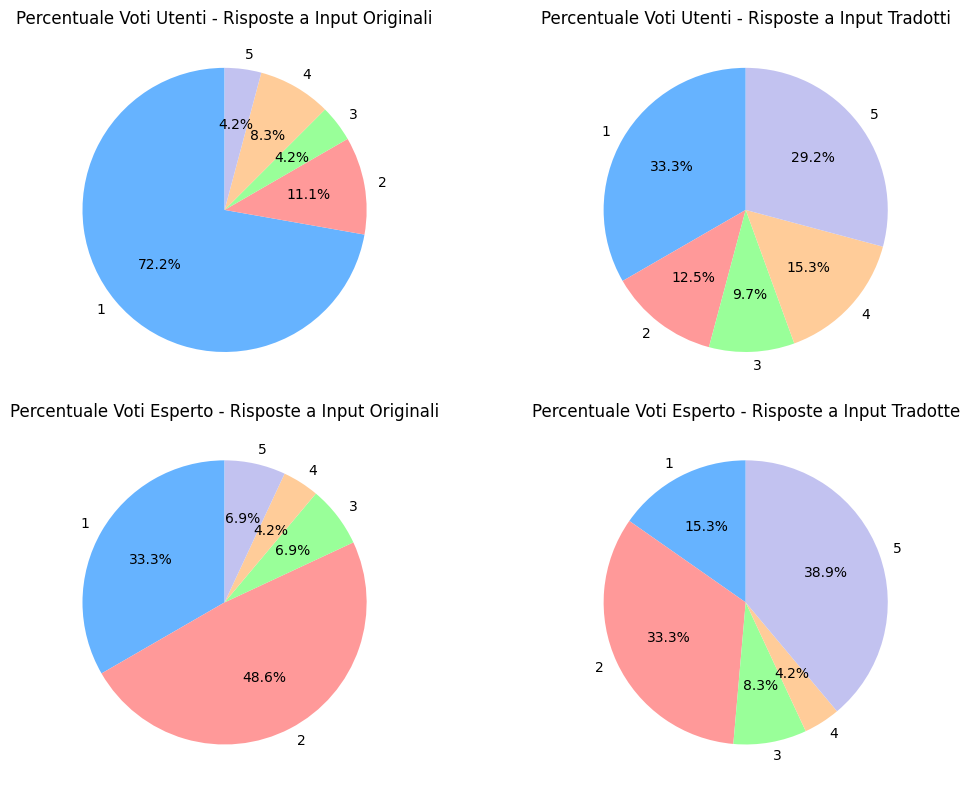

In [59]:
# Definiamo le colonne di interesse
columns = ['originalInputResponseVote', 'translatedInputResponseVote', 'expertOriginalInputResponseVote', 'expertTranslatedInputResponseVote']
votes_titles_pie = [
    'Percentuale Voti Utenti - Risposte a Input Originali', 
    'Percentuale Voti Utenti - Risposte a Input Tradotti', 
    'Percentuale Voti Esperto - Risposte a Input Originali', 
    'Percentuale Voti Esperto - Risposte a Input Tradotte'
]

# Creazione del grafico a torta per ogni tipo di valutazione
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Loop su ciascuna colonna
for i, column in enumerate(columns):
    # Conteggio delle valutazioni 1, 2, 3, 4, 5
    counts = diverse_df[column].value_counts().sort_index()
    
    # Creazione del grafico a torta
    axes[i].pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999','#99ff99','#ffcc99','#c2c2f0'])
    
    # Impostazioni del grafico
    axes[i].set_title(votes_titles_pie[i])

# Imposta un layout migliore
plt.tight_layout()
plt.show()


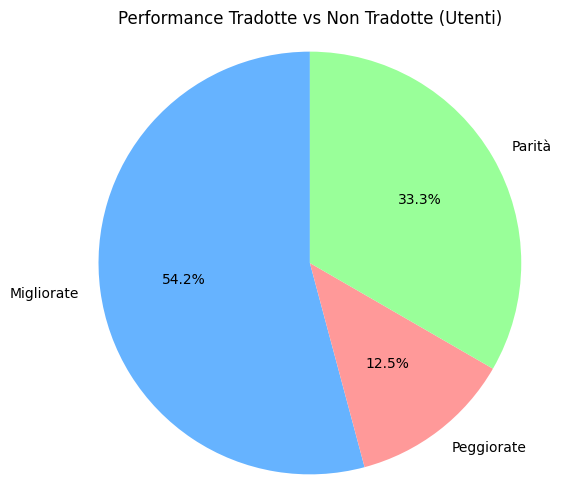

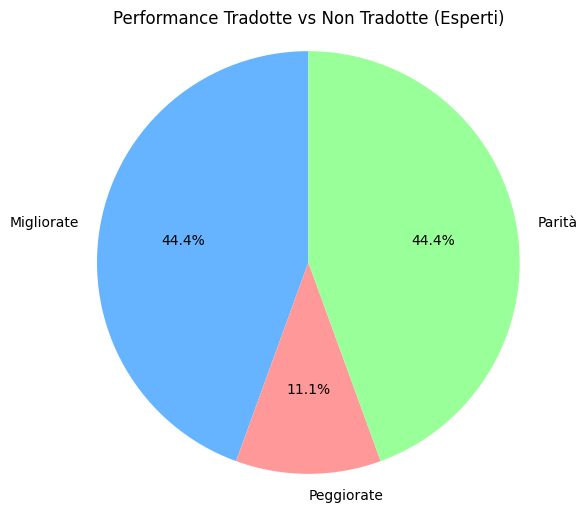

In [45]:
# Calcolo delle performance migliorate e peggiorate per gli utenti
migliorate_utenti = (diverse_df['translatedInputResponseVote'] > diverse_df['originalInputResponseVote']).sum()
peggiorate_utenti = (diverse_df['translatedInputResponseVote'] < diverse_df['originalInputResponseVote']).sum()
parita_utenti = (diverse_df['translatedInputResponseVote'] == diverse_df['originalInputResponseVote']).sum()

# Creazione del grafico a torta per le performance degli utenti
plt.figure(figsize=(6, 6))
plt.pie([migliorate_utenti, peggiorate_utenti, parita_utenti], labels=['Migliorate', 'Peggiorate', 'Parità'], autopct='%1.1f%%', colors=['#66b3ff', '#ff9999', '#99ff99'], startangle=90)
plt.title('Performance Tradotte vs Non Tradotte (Utenti)')
plt.axis('equal')
plt.show()

# Calcolo delle performance migliorate e peggiorate per gli esperti
migliorate_esperti = (diverse_df['expertTranslatedInputResponseVote'] > diverse_df['expertOriginalInputResponseVote']).sum()
peggiorate_esperti = (diverse_df['expertTranslatedInputResponseVote'] < diverse_df['expertOriginalInputResponseVote']).sum()
parita_esperti = (diverse_df['expertTranslatedInputResponseVote'] == diverse_df['expertOriginalInputResponseVote']).sum()

# Creazione del grafico a torta per le performance degli esperti
plt.figure(figsize=(6, 6))
plt.pie([migliorate_esperti, peggiorate_esperti, parita_esperti], labels=['Migliorate', 'Peggiorate', 'Parità'], autopct='%1.1f%%', colors=['#66b3ff', '#ff9999', '#99ff99'], startangle=90)
plt.title('Performance Tradotte vs Non Tradotte (Esperti)')
plt.axis('equal')
plt.show()